In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score, cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

In [ ]:
import pandas as pd
train_data = pd.read_excel('/content/drive/MyDrive/BuildModel/Molecular_Descriptor.xlsx')#,sheet_name='test')
# train_label = pd.read_excel('/content/drive/MyDrive/BuildModel/ADMET.xlsx')#,sheet_name='test')
# # 获取train_data的描述性数据
# t_describe = train_data.describe()
# t_describe = pd.DataFrame(t_describe.values.T, index=t_describe.columns, columns=t_describe.index)
# drop_index = pd.Series(t_describe[t_describe['mean']==0.].index)
# train_data = train_data.drop(drop_index,axis=1)
# train_data = train_data.set_index('SMILES')
# train_data.head()

In [ ]:
train_data.info()

In [4]:
train_label['Alabel'] = train_label.iloc[:,1:].sum(axis=1)

In [89]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1974 entries, Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4 to COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@H]3C[C@H]4O[C@@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Caco-2  1974 non-null   int64
 1   CYP3A4  1974 non-null   int64
 2   hERG    1974 non-null   int64
 3   HOB     1974 non-null   int64
 4   MN      1974 non-null   int64
 5   Alabel  1974 non-null   int64
dtypes: int64(6)
memory usage: 108.0+ KB


In [67]:
train_label.head()

,SMILES,Caco-2,CYP3A4,hERG,HOB,MN,Alabel
0,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5C...,0,1,1,0,0,2
1,Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN...,0,1,1,0,0,2
2,Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN...,0,1,1,0,1,3
3,Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCC...,0,1,1,0,0,2
4,Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCC...,0,1,1,0,0,2


In [55]:
f_label

['BCUTc-1l', 'MLFER_A', 'TopoPSA', 'hmin']

In [74]:
new_data = train_data.loc[:,f_label]
new_data['Alabel'] = train_label.loc[:,'Alabel']
new_data.head()

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel
SMILES,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360525,0.546,67.23,-0.436065,2
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.476881,2
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,-0.361379,1.089,87.46,-0.401857,3
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.452506,2
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.414507,2


In [80]:
new_data['pIC50'] = label2.loc[:,'pIC50']
new_data.head()

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel,pIC50
SMILES,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360525,0.546,67.23,-0.436065,2,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.476881,2,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,-0.361379,1.089,87.46,-0.401857,3,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.452506,2,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.414507,2,8.130768


In [81]:
new_data.describe()

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel,pIC50
count,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000,1974.000000
mean,-0.352068,0.795421,73.976667,-0.094194,2.706180,6.586112
std,0.029310,0.513592,44.585723,0.199544,0.936825,1.423023
min,-0.421762,-0.856000,12.470000,-0.588781,0.000000,2.455932
25%,-0.361379,0.546000,50.440000,-0.231488,2.000000,5.382154
50%,-0.360716,0.891000,66.490000,-0.073821,3.000000,6.580871
75%,-0.359364,1.089000,87.460000,0.049487,3.000000,7.568235
max,-0.188736,7.754000,1207.820000,0.388364,5.000000,10.337242


In [90]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1235 entries, Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4 to COc1cc(OC)cc(\C=C\c2ccc(OS(=O)(=O)[C@H]3C[C@H]4O[C@@H]3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)cc2)c1
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BCUTc-1l  1235 non-null   float64
 1   MLFER_A   1235 non-null   float64
 2   TopoPSA   1235 non-null   float64
 3   hmin      1235 non-null   float64
 4   Alabel    1235 non-null   int64  
 5   pIC50     1235 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 67.5+ KB


In [85]:
new_data1 = new_data.loc[new_data.loc[:,'Alabel']>=3,:]
new_data2 = new_data1.loc[new_data.loc[:,'pIC50']>=7.568235,:]
new_data2

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel,pIC50
SMILES,,,,,,
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,-0.361379,1.089,87.46,-0.401857,3,8.508638
Oc1ccc(cc1)C2=Cc3cc(O)ccc3C24Cc5ccc(OCCN6CCCCC6)cc5C4,-0.361389,1.089,52.93,-0.265020,3,9.000000
CC(C)(C)[C@H]1Sc2cc(O)ccc2O[C@H]1c3ccc(OCCN4CCCCC4)cc3,-0.360523,0.546,67.23,-0.420509,3,7.958607
CC(C)C[C@H]1Sc2cc(O)ccc2O[C@H]1c3ccc(OCCN4CCCCC4)cc3,-0.360523,0.546,67.23,-0.396065,3,8.522879
Oc1ccc(C[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4)cc1,-0.361379,1.089,87.46,-0.414507,3,8.568636
...,...,...,...,...,...,...
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(F)cc4)c5ccc(\C=C\c6cc(O)cc(O)c6)cc5,-0.363950,1.632,121.67,-0.417104,3,8.301030
Cc1ccccc1OS(=O)(=O)C2CC3OC2C(=C3c4ccc(O)cc4)c5ccc(\C=C\c6cc(O)cc(O)c6)cc5,-0.363949,1.632,121.67,-0.437729,3,8.000000
Cc1ccc(OS(=O)(=O)C2CC3OC2C(=C3c4ccc(O)cc4)c5ccc(\C=C\c6cc(O)cc(O)c6)cc5)cc1,-0.363949,1.632,121.67,-0.432104,3,8.698970


In [88]:
new_data2.describe()

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel,pIC50
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,-0.361871,0.978766,75.650561,-0.269178,3.096573,8.463546
std,0.011594,0.301911,23.034188,0.153787,0.316259,0.587281
min,-0.419854,0.003000,12.470000,-0.504357,3.000000,7.568636
25%,-0.361379,0.914000,60.770000,-0.406681,3.000000,7.982967
50%,-0.361308,1.089000,77.590000,-0.287606,3.000000,8.397940
75%,-0.360524,1.100000,87.460000,-0.182535,3.000000,8.920819
max,-0.280332,2.002000,152.460000,0.260130,5.000000,10.337242


In [86]:
new_data2.to_excel('/content/drive/MyDrive/BuildModel/final_result.xlsx')

In [78]:
label2 = pd.read_excel('/content/drive/MyDrive/BuildModel/ERα_activity.xlsx').set_index('SMILES')
label2.head()

,IC50_nM,pIC50
SMILES,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,2.5,8.602060
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,7.5,8.124939
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,3.1,8.508638
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,3.9,8.408935
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,7.4,8.130768


In [62]:
new_data = pd.concat([new_data,train_label.loc[:,'Alabel']],axis=1)

In [71]:
new_data.head()

,BCUTc-1l,MLFER_A,TopoPSA,hmin,Alabel
SMILES,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360525,0.546,67.23,-0.436065,NaN
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.476881,NaN
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,-0.361379,1.089,87.46,-0.401857,NaN
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.452506,NaN
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,-0.360530,0.546,67.23,-0.414507,NaN


In [69]:
train_label.set_index('SMILES')

,Caco-2,CYP3A4,hERG,HOB,MN,Alabel
SMILES,,,,,,
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0,2
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0,2
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,1,3
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0,2
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN5CCCCC5)cc4,0,1,1,0,0,2
...,...,...,...,...,...,...
COc1cc(OC)cc(\C=C\c2cccc(OS(=O)(=O)C3CC4OC3C(=C4c5ccc(O)cc5)c6ccc(O)cc6)c2)c1,0,1,1,0,1,3
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4cccc(\C=C\c5cc(O)cc(O)c5)c4)c6ccc(O)cc6,0,1,1,0,1,3
Oc1ccc(cc1)C2=C(C3OC2CC3S(=O)(=O)Oc4ccc(\C=C\c5cc(O)cc(O)c5)cc4)c6ccc(O)cc6,0,1,0,0,1,2


In [61]:
new_data.describe()

,BCUTc-1l,MLFER_A,TopoPSA,hmin
count,1974.000000,1974.000000,1974.000000,1974.000000
mean,-0.352068,0.795421,73.976667,-0.094194
std,0.029310,0.513592,44.585723,0.199544
min,-0.421762,-0.856000,12.470000,-0.588781
25%,-0.361379,0.546000,50.440000,-0.231488
50%,-0.360716,0.891000,66.490000,-0.073821
75%,-0.359364,1.089000,87.460000,0.049487
max,-0.188736,7.754000,1207.820000,0.388364


#### 特征处理

In [13]:
# 特征选择
t_data = train_data
#t_data = train_data.loc[:,attr_labels]
print(t_data.head())
t_label = train_label.iloc[:,6]
print(t_label.head())

# 标准化
# std_scaler = StandardScaler().fit(t_data)
# t_scaledata = std_scaler.transform(t_data)

# 0-1区间缩放
mm_scaler = MinMaxScaler().fit(t_data)
t_scaledata = mm_scaler.transform(t_data)

                                                    nAcid  ...  Zagreb
SMILES                                                     ...        
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCC3)c4ccc(OCCN5CC...      0  ...     166
Oc1ccc2O[C@H]([C@H](Sc2c1)C3CCCCCC3)c4ccc(OCCN5...      0  ...     174
Oc1ccc(cc1)[C@H]2Sc3cc(O)ccc3O[C@H]2c4ccc(OCCN5...      0  ...     176
Oc1ccc2O[C@H]([C@@H](CC3CCCCC3)Sc2c1)c4ccc(OCCN...      0  ...     174
Oc1ccc2O[C@H]([C@@H](Cc3ccccc3)Sc2c1)c4ccc(OCCN...      0  ...     174

[5 rows x 504 columns]
0    2
1    2
2    3
3    2
4    2
Name: Alabel, dtype: int64


In [33]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier

# t_scaledata = SelectFromModel(RandomForestClassifier(n_estimators=200,max_depth=10),threshold="0.8*mean").fit_transform(t_scaledata, t_label)

#### 创建训练集和测试集

In [14]:
X_train, X_test, y_train, y_test = train_test_split(t_scaledata, t_label, test_size=0.1)#,shuffle=False)

In [19]:
y_train

1169    4
786     3
917     3
1750    3
410     3
       ..
1744    3
1376    2
61      1
649     4
162     3
Name: Alabel, Length: 1579, dtype: int64

#### 网格搜索函数

In [15]:
from sklearn.metrics import make_scorer
# metric for evaluation
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
def mse(y_ture,y_pred):
    return mean_squared_error(y_ture,y_pred)

# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
mse_scorer = make_scorer(mse, greater_is_better=False)

In [16]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
def train_model(model, param_grid=[], X=[], y=[], splits=5, repeats=5):

    # 创建交叉验证
    rkfold = RepeatedKFold(n_splits=splits, n_repeats=repeats)

    # 判断是否进行网格搜索
    if len(param_grid) > 0:

        gsearch = GridSearchCV(model, param_grid, cv=rkfold, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, return_train_score=True)
        gsearch.fit(X, y)
        # print("打印所有模型结果")
        # print(gsearch.cv_results_['mean_test_score'])

        # 提取最好的模型
        model = gsearch.best_estimator_
        best_idx = gsearch.best_index_

        # 获取cv-scores
        grid_results = pd.DataFrame(gsearch.cv_results_)
        cv_mean = abs(grid_results.loc[best_idx, 'mean_test_score'])
        cv_std = grid_results.loc[best_idx, 'std_test_score']

    # 无需网格搜索
    else:
        grid_results = []
        cv_results = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=rkfold)
        cv_mean = abs(np.mean(cv_results))
        cv_std = np.std(cv_results)

    # 获取各部分结果的均值和标准差
    cv_score = pd.Series({'mean': cv_mean, 'std': cv_std})

    # 预测
    y_pred = model.predict(X)

    # 打印模型performance
    print('----------------------')
    print(model)
    print('----------------------')
    print('score=', model.score(X, y))
    print('rmse=', rmse(y, y_pred))
    print('mse=', mse(y, y_pred))
    print('cross_val: mean=', cv_mean, ', std=', cv_std)

    # 绘制残差
    y_pred = pd.Series(y_pred, index=y.index)
    resid = y - y_pred
    mean_resid = resid.mean()
    std_resid = resid.std()
    z = (resid - mean_resid) / std_resid
    n_outliers = sum(abs(z) > 3)

    plt.figure(figsize=(15, 5))
    ax_131 = plt.subplot(1, 3, 1)
    plt.plot(y, y_pred, '.')
    plt.xlabel('y')
    plt.ylabel('y_pred')
    plt.title('corr = {:.3f}'.format(np.corrcoef(y, y_pred)[0][1]))
    ax_132 = plt.subplot(1, 3, 2)
    plt.plot(y, y - y_pred, '.')
    plt.xlabel('y')
    plt.ylabel('y - y_pred')
    plt.title('std resid = {:.3f}'.format(std_resid))

    ax_133 = plt.subplot(1, 3, 3)
    z.plot.hist(bins=50, ax=ax_133)
    plt.xlabel('z')
    plt.title('{:.0f} samples with z>3'.format(n_outliers))

    return model, cv_score, grid_results

In [19]:
# 存储模型和模型的scores
opt_models = dict()
score_models = pd.DataFrame(columns=['mean','std'])
# k-fold splits
splits=5
# k-fold iterations
repeats=1

#### 随机森林模型

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 30.1min finished


----------------------
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
----------------------
score= 0.937734399036728
rmse= 0.23297577054278218
mse= 0.054277709660003164
cross_val: mean= 0.3283329340758561 , std= 0.02245479310630167


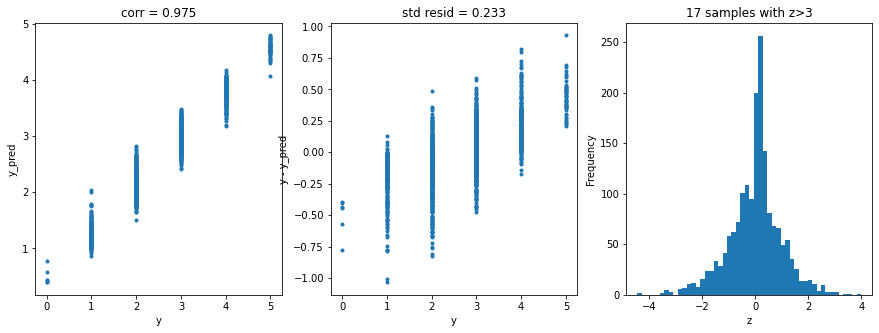

In [20]:
model = 'RandomForest'
opt_models[model] = RandomForestRegressor()

param_grid = {
    'n_estimators': [200,300,400],
    'max_depth':[11, 13, 15],
}

opt_models[model], cv_score, grid_results = train_model(opt_models[model], param_grid=param_grid, X=X_train, y = y_train, splits=splits, repeats=repeats)

cv_score.name = model
score_models = score_models.append(cv_score)

In [21]:
attr_names = pd.Series(t_data.columns)
feature_importances = opt_models[model].feature_importances_
result = sorted(zip(feature_importances, attr_names),reverse=True)
result = pd.DataFrame(result[:20]).loc[:,1]
result.to_excel('/content/drive/MyDrive/BuildModel/labels_of_four.xlsx')

#### 第四问，筛选

In [25]:
label1 = pd.read_excel('/content/drive/MyDrive/BuildModel/rf_labels.xlsx').iloc[:,1:]
label2 = pd.read_excel('/content/drive/MyDrive/BuildModel/labels_of_four.xlsx').iloc[:,1:]

In [43]:
f_label = []

In [44]:
for l1 in list(label1.iloc[:,0]):
  print(l1)
  if l1 in list(label2.iloc[:,0]):
    f_label.append(l1)


MDEC-23
LipoaffinityIndex
minsssN
maxssO
maxHsOH
minHsOH
C1SP2
BCUTc-1l
MLogP
VC-5
MLFER_A
nHBAcc
minsOH
minHBint5
MDEC-33
TopoPSA
ATSc3
hmin
SHsOH
ATSc2


In [46]:
f_label

['BCUTc-1l', 'MLFER_A', 'TopoPSA', 'hmin']